# equlizer 

## Histogram Equalization

* Enhancing the contrast in an image, bringing out details which were hard to see before.
* ref: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

* CLAHE (Contrast Limited Adaptive Histogram Equalization)

With **adaptive histogram equalization**, image is divided into small tiles. Then each of these titles are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If *noise* is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit, those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove *artifacts in tile borders*, bilinear interpolation is applied.

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display, HTML
import math
%matplotlib inline

In [5]:
def plot_of_equalizer(img):
    # equalizer
    equ_img = cv2.equalizeHist(img)
    # clahe
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl_img = clahe.apply(img)

    # stacking images side-by-side
    res = np.hstack((img, equ_img, cl_img))
    plt.imshow(res);
    plt.axis('off');
    return (img, equ_img, cl_img)

def plot_of_grayscaleHistogram(imgs):
    origin_img, equ_img, cl_img = imgs
    # Three subplots sharing both x/y axes
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
    ax1.hist(origin_img.flatten(),256,[0,256], color = 'r')
    ax1.set_title('grayscale histogram of original img, histo equalizer, Clahe')
    ax2.hist(equ_img.flatten(),256,[0,256], color = 'r')
    ax3.hist(cl_img.flatten(),256,[0,256], color = 'r')
    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.show()
    
def transform_to_uin8(imgs):
    return np.array(imgs, dtype=np.uint8)

def image_Normalization(img_batches):
    return ((np.float32(img_batches)-128.0) / 128.0)

def grayscale_cv2(img):
    """
    input is an uint8 type image
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

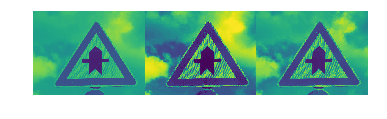

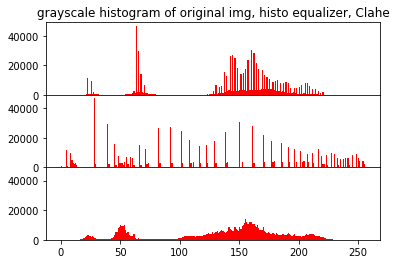

In [6]:
img = plt.imread("img//sample_traffic_sign.jpg")
grayscale_img = grayscale_cv2(img)
equalizer_images = plot_of_equalizer(grayscale_img)
plot_of_grayscaleHistogram(equalizer_images)

# Model note

* Example
  - Input width = 13
  - Filter width = 6
  - Stride = 5

* "VALID" = without padding:

In [8]:
"""
inputs:     1  2  3  4  5  6  7  8  9  10  11  (12  13)
            |______________|                 dropped
                           |________________|
""";

* "SAME" = with zero padding:

In [9]:
"""
         pad|                                           |pad
  inputs: 0-|-1--2--3--4--5--6--7--8--9--10--11--12--13-|-0--0
          |_______________|
                          |_______________|
                                          |__________________|
""";

> **VALID** only ever drops the right-most columns (or bottom-most rows).

> **SAME** tries to pad evenly left and right, but if the amount of columns to be added is odd, it will add the extra column to the right, as is the case in this example (the same logic applies vertically: there may be an extra row of zeros at the bottom).

In [10]:
# SAME Padding, the output height and width are computed as:
# out_height = ceil(float(in_height) / float(strides[1]))
# out_width = ceil(float(in_width) / float(strides[2]))

# VALID Padding, the output height and width are computed as:
# out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
# out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))